/tmp/ipykernel_161/2725657455.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(faces)


Loaded:  (25,)


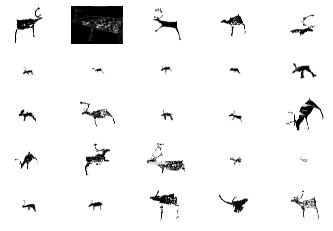

In [12]:
# load and plot deers
from os import listdir
from numpy import asarray
from PIL import Image
from matplotlib import pyplot

def load_image(filename):
# load image from file
    image = Image.open(filename)
# convert to RGB, if needed
    image = image.convert('RGB')
# convert to array
    pixels = asarray(image)
    return pixels

# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # load the image
        pixels = load_image(directory + filename)
        # store
        faces.append(pixels)
        # stop once we have enough
        if len(faces) >= n_faces:
            break
    return asarray(faces)

#plotting images arranged into in a square.
def plot_faces(faces, n):
    for i in range(n * n):
# define subplot
        pyplot.subplot(n, n, 1 + i)
# turn off axis
        pyplot.axis('off')
# plot raw pixel data
        pyplot.imshow(faces[i])
    pyplot.show()

# directory that contains all images
directory = '/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/4/cut_photoshop/'
# load and extract all faces
faces = load_faces(directory, 25)
print('Loaded: ', faces.shape)
# plot faces
plot_faces(faces, 5)

## Отцентровать изображения

In [10]:
import cv2
from matplotlib import pyplot as plt
  
# Opening image
img = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/petroglyph/4/cut_photoshop/4-76-2.png")
  
# OpenCV opens images as BRG 
# but we want it as RGB We'll 
# also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  
# Use minSize because for not 
# bothering with extra-small 
# dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('stop_data.xml')
  
found = stop_data.detectMultiScale(img_gray, 
                                   minSize =(20, 20))
# Don't do anything if there's 
# no sign
amount_found = len(found)
  
if amount_found != 0:
      
    # There may be more than one
    # sign in the image
    for (x, y, width, height) in found:
          
        # We draw a green rectangle around
        # every recognized sign
        cv2.rectangle(img_rgb, (x, y), 
                      (x + height, y + width), 
                      (0, 255, 0), 5)
          
# Creates the environment of 
# the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

error: OpenCV(4.5.2) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## Make square, white background, control size

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3
        #padColor = cv2.BORDER_REPLICATE

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_REPLICATE)

    return scaled_img

# sq_img = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/petroglyph/4/cut_photoshop/4-1-13.png") # square image

# scaled_sq_img = resizeAndPad(sq_img, (100,100), 127)
# plt.imshow(scaled_sq_img)
# print(scaled_sq_img.shape )
# plt.show()

https://answers.opencv.org/question/98980/how-to-retrieve-all-coordinates-of-pixels-of-specific-colour-in-an-image/ 

[ 0 14  2]
(1200, 1920, 3)
6912000
uint8


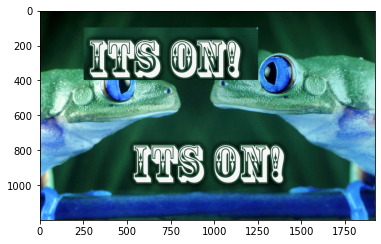

In [6]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv.imread('/mnt/c/Users/Maria/Pictures/Saved Pictures/74008.jpg')

px = img[100,90]
print( px )
print( img.shape )
plt.imshow(img)
print( img.size ) # number of pixels
print( img.dtype )

text = img[700:1000, 500:1500]
img[100:400, 250:1250] = text
plt.imshow(img)



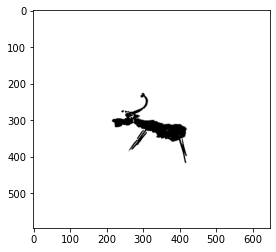

(array([227, 227, 227, ..., 416, 416, 416]), array([299, 299, 299, ..., 417, 417, 417]), array([0, 1, 2, ..., 0, 1, 2]))
222 421 211 424
(100, 100, 3)


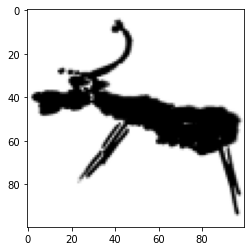

In [39]:
#zeros = np.zeros((100, 100), dtype=np.uint8)
#zeros[:5,:5] = 255
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

sq_img = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/images/4/cut_photoshop/4-1-2.png") # square image

plt.imshow(sq_img)
plt.show()

indices = np.where(sq_img == [0])
print(indices)
#coordinates = zip(indices[0], indices[1])
minimum_y = np.amin(indices[0]) - 5
maximum_y = np.amax(indices[0]) +5
minimum_x = np.amin(indices[1]) -5
maximum_x = np.amax(indices[1]) +5
print(minimum_y, maximum_y, minimum_x, maximum_x)


deer = sq_img[minimum_y:maximum_y, minimum_x:maximum_x]



# sq_img[0:97, 0:217] = deer
plt.imshow(deer)
#scaled_img = cv2.copyMakeBorder(deer, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_REPLICATE)
scaled_sq_img = resizeAndPad(deer, (100,100), 127)
plt.imshow(scaled_sq_img)
print(scaled_sq_img.shape )
plt.show()
#plt.imshow(scaled_img)

In [ ]:
# TechVidvan Object detection of similar color
import cv2
import numpy as np
# Reading the image
img = cv2.imread('/mnt/c/Users/Maria/Documents/DH/petroglyphs/petroglyph/4/cut_photoshop/4-76-2.png')
# Showing the output
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# convert to hsv colorspace
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower bound and upper bound for Green color
#lower_bound = np.array([50, 20, 20])   
#upper_bound = np.array([100, 255, 255])
# find the colors within the boundaries
#mask = cv2.inRange(hsv, lower_bound, upper_bound)

In [1]:
# https://answers.opencv.org/question/134248/how-to-define-the-lower-and-upper-range-of-a-color/ 
import cv2
import numpy as np

image_hsv = None   # global ;(
pixel = (20,60,80) # some stupid default

# mouse callback function
def pick_color(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        pixel = image_hsv[y,x]

        #you might want to adjust the ranges(+-10, etc):
        upper =  np.array([pixel[0] + 10, pixel[1] + 10, pixel[2] + 40])
        lower =  np.array([pixel[0] - 10, pixel[1] - 10, pixel[2] - 40])
        print(pixel, lower, upper)

        image_mask = cv2.inRange(image_hsv,lower,upper)
        cv2.imshow("mask",image_mask)

def main():
    import sys
    global image_hsv, pixel # so we can use it in mouse callback

    image_src = cv2.imread(sys.argv[1])  # pick.py my.png
    if image_src is None:
        print ("the image read is None............")
        return
    cv2.imshow("bgr",image_src)

    ## NEW ##
    cv2.namedWindow('hsv')
    cv2.setMouseCallback('hsv', pick_color)

    # now click into the hsv img , and look at values:
    image_hsv = cv2.cvtColor(image_src,cv2.COLOR_BGR2HSV)
    cv2.imshow("hsv",image_hsv)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__=='__main__':
    main()

the image read is None............


## Оставить только черное
https://stackoverflow.com/questions/23680498/detect-gray-things-with-opencv
https://pyimagesearch.com/2014/08/04/opencv-python-color-detection/
https://stackoverflow.com/questions/50850692/opencv-replace-all-black-colored-pixels-in-video-with-white
https://stackoverflow.com/questions/54978271/opencv-plot-black-pixels-on-a-image
https://techvidvan.com/tutorials/detect-objects-of-similar-color-using-opencv-in-python/
https://answers.opencv.org/question/219194/black-and-white-image-detection/

In [ ]:
import numpy as np 
import cv2
    # load image
img = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/petroglyph/4/cut_photoshop/01-3-1.png")

     # Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # define range of black color in HSV
lower_val = np.array([0,0,0])
upper_val = np.array([179,255,127])

    # Threshold the HSV image to get only black colors
mask = cv2.inRange(hsv, lower_val, upper_val)

    # invert mask to get black symbols on white background
mask_inv = cv2.bitwise_not(mask)

    # display image
cv2.imshow("Mask", mask_inv)
cv2.imshow("Img", img)

cv2.waitKey(0)
#cv2.destroyAllWindows()

## change backgroung colour
source: https://github.com/fiyero/Opencv_replace_bg/blob/master/OpenCV_replace_bg_git.ipynb

This image is: <class 'numpy.ndarray'>  with dimensions: (911, 733, 3)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


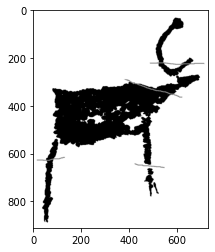

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/petroglyph/4/cut_photoshop/01-3-1.png")
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

image_copy = np.copy(image)
plt.imshow(image_copy)

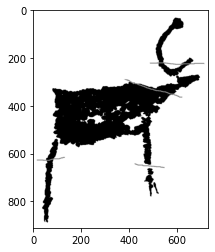

In [13]:
# https://note.nkmk.me/en/python-opencv-bgr-rgb-cvtcolor/ 
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

Define the color threshold

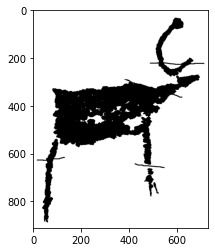

In [14]:
lower_white = np.array([240,240,240])  
upper_white = np.array([255,255,255])
# create a mask
mask = cv2.inRange(image_copy, lower_white, upper_white)
plt.imshow(mask, cmap='gray')

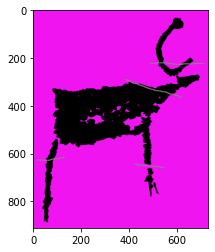

In [15]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [240, 20, 240]
plt.imshow(masked_image)

##  Reduce grey 
неопробован, ядро умирает

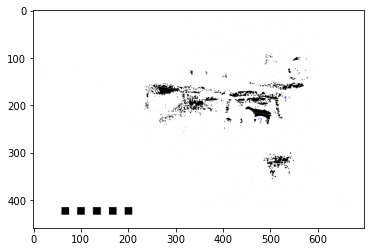

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("/mnt/c/Users/Maria/Documents/DH/petroglyphs/petroglyph/4/numbered/4.IV-5.png")
#image = np.zeros((400,400,3), dtype="uint8")

#image[np.where((image==[136,136,136]).all(axis=2))] = [255,255,255]
image[np.where(((image>[70, 70, 70]) & (image <[245, 245, 245])).all(axis=2))] = [255,255,255]

image = plt.imshow(image)
plt.savefig('image.png')

inRange(img, l_s, r_s). 
Первый параметр — изменяемое изображение, а второй и третий — левая и правая граница пропускаемого цвета.
https://robx.org/wiki/prog/opencv-biblioteka/filtraciya-v-opencv/


# Задать одинаковые поля вокруг объекта